<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

<CENTER><h1>Intro to histogramming</h1></CENTER> <a name="c"></a>

In particle physics, we use so many events to make our measurements that looking at the events by hand would be very impractical - instead, we use computer code to do the looking for us.

This notebook will walk you through some basic computing techniques commonly used in high energy physics (HEP) analyses. You will learn how to:

1. Interact with ATLAS data files
2. Create a histogram for displaying data
3. Fill your histogram
4. Draw your histogram
5. Normalise your histogram
    
We will be showing you examples of these techniques to produce a plot with the __number of leptons__ in each event in a set of 13 TeV Z boson data. At the same time, you will be following along to produce your own plot with the __number of jets__ in each event in a set of 8 TeV W and Z boson data. TeV stands for 'Tera-electron-volt' and is a unit of energy we use in particle physics - we will learn more about the units we use in particle physics in the next notebook!
    
<table><tr>

<td> <img src="./images/WBoson.png" style="height: 150px;"/> </td>
</tr></table>

---

Before you get into your histogramming and are introduced to Z invariant mass, make sure you review the fundamentals of particle physics and the Standard Model by watching [this](https://youtu.be/hmM-ic4Wh68) RAL video by Dr Emmanuel Olaiya.

**Contents:**
- [Step 0](#0.)
- [Step 1](#1.)
- [Step 2](#2.)
- [Step 3](#3.)
- [Step 4](#4.)
- [Step 5](#5.)
- [Extension exercises](#6.)

---

## Step 0: What to load <a name="0."></a>

The software we will use to analyse our ATLAS data is called __uproot__. Using `uproot`, we are able to process large datasets, do statistical analyses, and visualise our data using __histograms__. `uproot` also has its own format for __storing__ data - we'll come back to this later.

In [2]:
#Import the uproot library
import uproot

#Here you could also import any other python libraries you would like to use
import matplotlib.pyplot as plt
import numpy as np

---

## Step 1: Working with .root files <a name="1."></a>

Next we have to open the data files that we want to analyze. 

As mentioned above, ROOT has it's own format for storing physics data - a _[something].root_ file. For each event in the dataset we could have many particles, and for each particle, there are several __variables__ we measure (e.g. energy, momentum, charge). The structure of a _*.root_ file is as follows:


- A _.root_ file stores and keeps track of all this information in a container called a __TTree__. 
- Inside the TTree, each variable that we measure are stored separately in containers called __branches__. 
- Inside each branch, the measurement of that variable for each event is stored.

<CENTER><img src="./images/root_struct.png" style="width:70%"></CENTER>

Lets load our _.root_ file using `uproot`'s `uproot.open()` function. The __argument__ inside the brackets tells uproot where to look for the file.

In [3]:
f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root") ## 13 TeV sample
#f = uproot.open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root") ## 8 TeV sample

_You could uncomment one of the other lines to repeat the analysis we will do below for a different dataset (remember to comment out the top line first)._

(If you are curious about where the files above come from, check out the instructions for finding the ATLAS Open Data <a href="FindingOpenData.pdf"> here</a>.) 

Next, to inspect the contents of a _.root_ file, we use the `.keys()` function.

In [ ]:
f.keys()

We can see what this object 'mini' is using the `.classnames()` function.

In [ ]:
f.classnames()

This means *mini* is a TTree object and should contain all the data we need.  To load the TTree data directly, we can select it using the below code.

In [4]:
my_tree = f["mini"]

Alternatively, we can change our file loading code so it specifies the TTree file *mini*.

In [ ]:
my_tree = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")

The `.show()` function allows us to see the full contents of our TTree.

In [25]:
my_tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
channelNumber        | int32_t                  | AsDtype('>i4')
mcWeight             | float                    | AsDtype('>f4')
scaleFactor_PILEUP   | float                    | AsDtype('>f4')
scaleFactor_ELE      | float                    | AsDtype('>f4')
scaleFactor_MUON     | float                    | AsDtype('>f4')
scaleFactor_PHOTON   | float                    | AsDtype('>f4')
scaleFactor_TAU      | float                    | AsDtype('>f4')
scaleFactor_BTAG     | float                    | AsDtype('>f4')
scaleFactor_LepTR... | float                    | AsDtype('>f4')
scaleFactor_Photo... | float                    | AsDtype('>f4')
trigE                | bool                     | AsDtype(

In [40]:
lep_pt = my_tree["lep_pt"].array(library="np")
lep_pt

array([array([169903.48, 142998.28], dtype=float32),
       array([211820.23,  78281.89], dtype=float32),
       array([234039.14  ,   8108.9414], dtype=float32), ...,
       array([116714.4], dtype=float32),
       array([174998.83,  79250.9 ], dtype=float32),
       array([314123.25, 278301.5 ], dtype=float32)], dtype=object)

In [41]:
lep_eta = my_tree["lep_eta"].array(library="np")
lep_eta

array([array([-1.8025961, -1.29893  ], dtype=float32),
       array([ 0.04702532, -0.12980008], dtype=float32),
       array([ 0.5145523, -0.5389483], dtype=float32), ...,
       array([-0.24873704], dtype=float32),
       array([0.63657373, 0.06841107], dtype=float32),
       array([0.78326404, 0.05061899], dtype=float32)], dtype=object)

In [42]:
lep_phi = my_tree["lep_phi"].array(library="np")
lep_phi

array([array([ 3.0199232, -2.9465997], dtype=float32),
       array([-3.0646539,  2.5374086], dtype=float32),
       array([-2.36613  , -0.6087628], dtype=float32), ...,
       array([-1.3996392], dtype=float32),
       array([1.6153971, 2.137508 ], dtype=float32),
       array([-1.3460228,  1.6637794], dtype=float32)], dtype=object)

### Over to you

__1)__ __Replace the ###'s in the cell below__ to open the _*.root_ data file `"http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root"`

<details>
    <summary>Click here for hint 1: </summary>
    
    What function did we use above to open a .root file?
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Use the function .Get(). This function is applied to a file.
</details>

<details>
    <summary>Click here for hint 3: </summary>
    The GetEntries() function tells us how many events are in the tree. This function is applied to a TTree.
</details>

In [ ]:
my_file = ###

<details>
    <summary>Answer: </summary>

    my_file = uproot.open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")
</details>

__2)__ Load the tree named "mini" stored in the _.*root_ data file. Print the number of events in this tree.

<details>
    <summary>Click here for hint 1: </summary>
    All data is stored in the TTree 'mini'.
</details>

<details>
    <summary>Click here for hint 2: </summary>
    The object we are after is called "eventNumber".
</details>

<details>
    <summary>Click here for hint 3: </summary>
    Specify the file type as a numpy array.
</details>

In [ ]:
my_tree = my_file[###]
eventNumber = my_tree[###].array(###)
print(###)

<details>
    <summary>Answer: </summary>
        
    my_tree = my_file["mini"]
    eventNumber = my_tree["eventNumber"].array(library="np")
    print(eventNumber)
</details>

__3)__ We will also need to create variables for the maximum number of jets and the minimum number of jets in a single event in this dataset for later.

<details>
    <summary>Click here for hint 1: </summary>
    The object you need is called "jet_n". 
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Numpy has two functions, .min() and .max(), that return the minimum and maximum values of an array.
</details>

In [ ]:
import ###

jet_n = my_tree[###].array(###)
minimum = ###
maximum = ###
print("Minimum number of jets:", ###)
print("Maximum number of jets;", ###)

<details>
    <summary>Answer: </summary>
        
    import numpy as np

    jet_n = my_tree["jet_n"].array(library="np")
    minimum = np.min(jet_n)
    maximum = np.max(jet_n)
    print("Minimum number of jets:", minimum)
    print("Maximum number of jets;", maximum)
</details>

[Return to contents](#c)

---

## Step 2: Getting ready to display histograms <a name="2."></a>

Before we can display any histograms, we must import a few modules:
- `hist` is a library that handles the generation and customization of histograms
- `Hist` is a module from `hist` that allows for the generation of a basic histogram

In [5]:
import hist
from hist import Hist

Let's generate a regular histogram using `Hist`; we'll use the `hist.axis.Regular()` option, which takes arguments `(bins, lower_lim, upper_lim, label = "axis label")`.  Here, the **bins** of our histogram are 'slices' of the range of values we fill our histogram with.  But what to fill our histogram with?

A simple choice would be the number of leptons, as we can guess the number of bins and both the upper and lower limits fairly easily; the smallest number of leptons would be $0$ and the largest number $4$ - this corresponds to 5 bins ($0,1,2,3,4$), a lower limit of $0$ and an upper limit of $4$.  Let's implement this:

In [6]:
hist1 = Hist(hist.axis.Regular(5, 0, 4, label = "Number of leptons"))

### Over to you

__4)__ Create a template histogram called "Number of jets" to display your plot.

<details>
    <summary>Click here for hint 1: </summary>
    Use the minimum (-0.5) and maximum (+0.5) number of jets for your axis limits.  As for why the offsets, you'll see why later.
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Use the maximum number of jets for your bin numbers.
</details>

In [ ]:
my_hist = Hist(hist.axis.Regular(###, ###, ###, label = ###))

<details>
    <summary>Answer: </summary>
        
    my_hist = Hist(hist.axis.Regular(5, minimum-0.5, maximum+0.5, label = "Number of jets"))
</details>

[Return to contents](#c)

---

## Step 3: Filling histograms <a name="3."></a>

Now to fill our histogram!  The first step is to extract the number of leptons from our TTree using `uproot`.  We'll want to extract it in the form of a `numpy` array like so:

In [7]:
lep_n = my_tree["lep_n"].array(library="np")

This is the data we shall use to fill our histogram using the `.fill()` function from `hist`.  It's very simple:

In [8]:
hist1.fill(lep_n)

Hist(Regular(5, 0, 4, label='Number of leptons'), storage=Double()) # Sum: 53650.0 (53653.0 with flow)

To properly render our histogram, we'll need to plot it using the `.plot()` function from `hist` and the `plt.show()` function from `matplotlib`.  Let's import `matplotlib` and do exactly this.

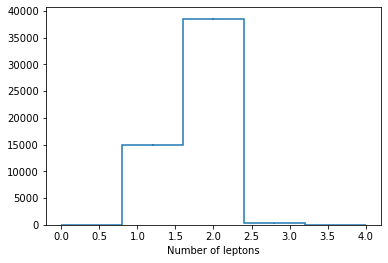

In [9]:
hist1.plot()
plt.show()

By default, the bins should be centred on the midpoint values they represent, but this is not the case here.  To achieve this, we set the lower bin edge to a value of $-0.5$ (so its midpoint is at $0$) and the upper bin edge to $4.5$ (so its midpint is at $4$) - the other bin edges will follow the same pattern.

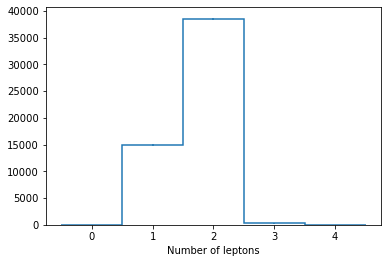

In [10]:
hist2 = Hist(hist.axis.Regular(5, -0.5, 4.5, label = "Number of leptons"))
hist2.fill(lep_n)
hist2.plot()
plt.show()

_In later examples, we'll be more picky about the events we put in our histogram, skipping some events in the tree if they don't meet certain criteria. This is called making __cuts__._

### Over to you

__5)__ Fill your histogram with the number of jets in each event.

<details>
    <summary>Click here for hint 1: </summary>
        Remember: we've already made a template histogram.
</details>

<details>
    <summary>Click here for hint 2: </summary>
        The data you're after is "jet_n".
</details>

In [ ]:
my_hist.fill(###)
my_hist.###
plt.###

<details>
    <summary>Answer: </summary>
        
    my_hist.fill(jet_n)
    my_hist.plot()
    plt.show()
</details>

[Return to contents](#c)

---

## Step 4: Drawing histograms <a name="4."></a>

Adding a title to a histogram is fairly easy - you simply pass `plt.title()`.

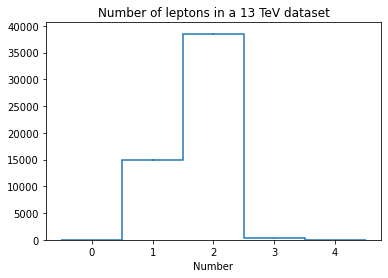

In [11]:
hist2 = Hist(hist.axis.Regular(5, -0.5, 4.5, label = "Number"))
hist2.fill(lep_n)
hist2.plot()
plt.title("Number of leptons in a 13 TeV dataset")
plt.show()

We can also include multiple histograms on the same axis, which is useful if you're trying to look for a particularly elusive particle.  Let's start by accessing the necessary `.root` files.

In [12]:
tr1 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363491.lllv.1largeRjet1lep.root:mini")
lep_n1 = tr1["lep_n"].array(library = "np")

In [13]:
tr2 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363492.llvv.1largeRjet1lep.root:mini")
lep_n2 = tr2["lep_n"].array(library = "np")

In [14]:
tr3 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363493.lvvv.1largeRjet1lep.root:mini")
lep_n3 = tr3["lep_n"].array(library = "np")

Here, the events in question produced leptons and their associated neutrinos.  We're curious as to how many leptons were produced in each event and how these numbers compare, so overlapping our histograms would be preferable.  We can use the `.stack()` function from `hist`, though we'll need to prepare a little first.

Let's start with the axis of our template histogram, which will be the same as our previous histogram on lepton numbers.

In [15]:
ax = hist.axis.Regular(5, -0.5, 4.5, flow=False, name = "Number of leptons")

Now we need a 'category axis' or `cax`, which operates in a similar manner to a dictionary.  Its $1^{st}$ argument is a list of histogram labels and its $2^{nd}$ argument is a label for the collective axis.  In effect, each histogram label is like a key, linking each histogram to its name, color and position.

In [16]:
cax = hist.axis.StrCategory(["lllv", "llvv", "lvvv"], name = "c")

Now to generate our 'stacked' histogram.  `Hist()` actually takes two arguments - the *axis* and the *category axis*.

In [17]:
full_hist = Hist(ax, cax)

`.fill()` also takes two arguments - *data* and *category*.  Let's fill for each dataset.

In [18]:
full_hist.fill(lep_n1, c = "lllv")
full_hist.fill(lep_n2, c = "llvv")
full_hist.fill(lep_n3, c = "lvvv")

Hist(
  Regular(5, -0.5, 4.5, underflow=False, overflow=False, name='Number of leptons', label='Number of leptons'),
  StrCategory(['lllv', 'llvv', 'lvvv'], name='c', label='c'),
  storage=Double()) # Sum: 1058422.0

Yep, this is impossible to read - particularly as we have no idea which monochrome shade represents which dataset!  We need to stack our histograms first.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbc1c2517d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbc1c25d690>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbc1c25d5d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

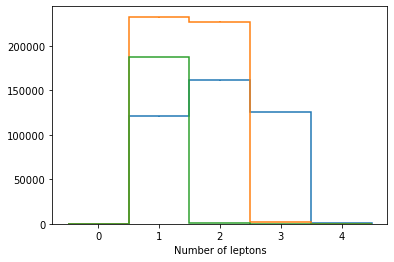

In [19]:
s = full_hist.stack("c")
s.plot()

This is slightly more discernible, but we still don't know which histogram is which!  We should add  a title and a legend to properly render our stacked histogram, as well as fill it in so the coloured regions are more visible.

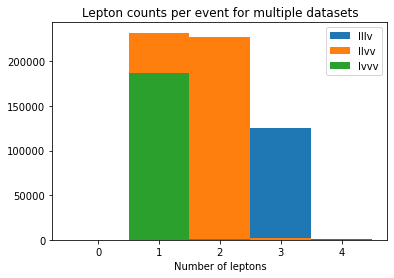

In [20]:
s = full_hist.stack("c")
s.plot(histtype = "fill")
plt.title("Lepton counts per event for multiple datasets")
plt.legend()
plt.show()

Here, we've used the condition `histtype = "fill"` when plotting our histogram.

Often, you may want to see how your histogram behaves as compared to a particular expression - this is called **curve fitting**.  Look at the below example.

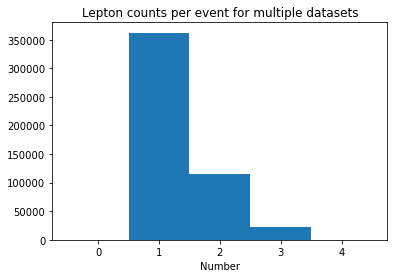

In [129]:
f = uproot.open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")
tree = f["mini"]
lep_n = tree["lep_n"].array(library="np")
lep_n

hist_n = Hist(hist.axis.Regular(5, -0.5, 4.5, label = "Number"))
hist_n.fill(lep_n)

hist_n.plot(histtype = "fill")
plt.title("Lepton counts per event for multiple datasets")
plt.show()

This looks like half of a bell curve (normal distribution), doesn't it?  Let's try and fit it against one.  The first step is to increase the 'resolution' of our plot by increasing the number of bins.  Let's just make a new histogram with, say, 100 bins and fill it with `lep_n`.

In [133]:
hist_n2 = Hist(hist.axis.Regular(100, -0.5, 4.5, label = "Number of leptons"))
hist_n2.fill(lep_n)

Hist(Regular(100, -0.5, 4.5, label='Number of leptons'), storage=Double()) # Sum: 499999.0 (500000.0 with flow)

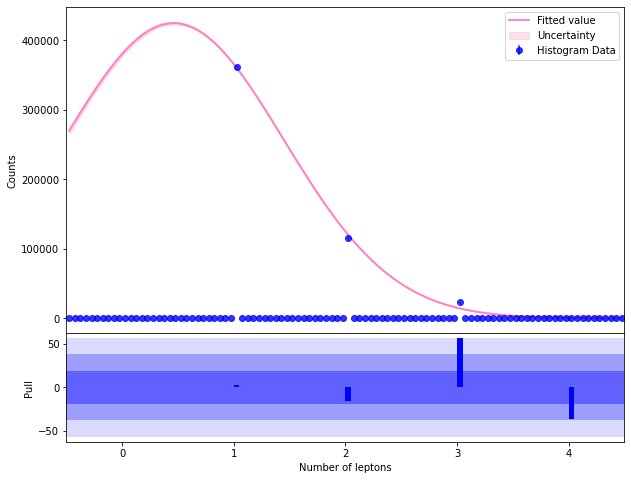

In [136]:
fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = hist_n2.plot_pull(
    "normal", # Type of distribution - arguments are "normal", "gauss" and "gaus" though can put externally defined function
    eb_ecolor="b",
    eb_mfc="b",
    eb_mec="b",
    eb_fmt="o",
    eb_ms=6, # Dot site
    eb_capsize=0,
    eb_capthick=2,
    eb_alpha=0.8, # Opacity 0-1; lower = less opaque
    fp_c="hotpink", # Fitted line colour
    fp_ls="-",
    fp_lw=2, # Fitted line width
    fp_alpha=0.8,
    bar_fc="b", # Bar colour
    pp_num=3,
    pp_fc="b", # Background colour
    pp_alpha=0.618,
    pp_ec=None,
    ub_alpha=0.2,
)

As for all of the datapoints located at the bottom of the fitted curve, these are a result of the extra bins - only the integer-valued bins have a non-zero value for the number of leptons, so the rest all take values of zero.

### Over to you

__6)__ Display multiple histograms for lepton number on the same plot.  You'll need the below files:
- 4 leptons - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root
- 3 leptons - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363491.lllv.1largeRjet1lep.root
- 2 leptons - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363492.llvv.1largeRjet1lep.root
- 1 lepton - https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363493.lvvv.1largeRjet1lep.root

<details>
    <summary>Click here for hint 1: </summary>
        You'll need to access the TTree data for lepton number 4 separate times, 1 for each dataset.
</details>

<details>
    <summary>Click here for hint 2: </summary>
        Think about the bin numbers and boundaries for your axis, and remember that we have 4 datasets now when generating the category axis.
</details>

<details>
    <summary>Click here for hint 3: </summary>
        You'll need to fill your template histogram 4 times.
</details>

In [ ]:
tr1 = uproot.open(###)
lep_n1 = tr1[###].array(###)

### Repeat 4 times

ax = hist.axis.Regular(###)
cax = hist.axis.StrCategory([###], name = ###)
full_hist = Hist(###, ###)

full_hist.fill(###, c = ###)
### Repeat 4 times

s = full_hist.stack(###)
s.###
plt.title(###)
plt.###
plt.###

<details>
    <summary>Answer: </summary>
        
    tr1 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root:mini")
    lep_n1 = tr1["lep_n"].array(library = "np")
    
    tr2 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363491.lllv.1largeRjet1lep.root:mini")
    lep_n2 = tr2["lep_n"].array(library = "np")
    
    tr3 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363492.llvv.1largeRjet1lep.root:mini")
    lep_n3 = tr3["lep_n"].array(library = "np")
    
    tr4 = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_363493.lvvv.1largeRjet1lep.root:mini")
    lep_n4 = tr4["lep_n"].array(library = "np")

    ax = hist.axis.Regular(5, -0.5, 5.5, flow=False, name = "Number of leptons")
    cax = hist.axis.StrCategory(["4l", "3l1v", "2l2v", "1l3v"], name = "c")
    full_hist = Hist(ax, cax)
    
    full_hist.fill(lep_n1, c = "4l")
    full_hist.fill(lep_n2, c = "3l1v")
    full_hist.fill(lep_n3, c = "2l2v")
    full_hist.fill(lep_n4, c = "1l3v")
    
    s = full_hist.stack("c")
    s.plot()
    plt.title("Lepton counts per event for multiple datasets")
    plt.legend()
    plt.show()
</details>

[Return to contents](#c)

---

## Step 5: Normalising histograms <a name="5."></a>

Often, we are more interested in the __proportions__ of our histogram than the absolute number of events it contains (which can change depending on what dataset you use).  Our final step will be to rescale the y-axis of our histogram to that the histogram's total is equal to 1. This is called __normalisation__.

Firstly, we must extract the bin values (heights) as an array, which can be done with the `.values` function.

In [172]:
arr1 = hist1.values()

We use the `.sum()` function on our array of bin values to sum the values it contains, then create a new array containing each of the original bin values divided by the sum.

In [173]:
arr2 = arr1/arr1.sum()

Let's make a new template histogram:

In [174]:
hist3 = Hist(hist.axis.Regular(5, -0.5, 4.5, flow=False, label = "Number of leptons"))

Now we assign our normalised bin values to the original bin values.  Here, we use the length of our `values()` array to refer to the index - simply remove 1 from the full length to refer to the final value, as typical of Python indexing.

In [176]:
binsize = hist1.values()
uplim = len(binsize)-1
hist3[0:uplim] = arr2[0:uplim]

Let's see what we get!

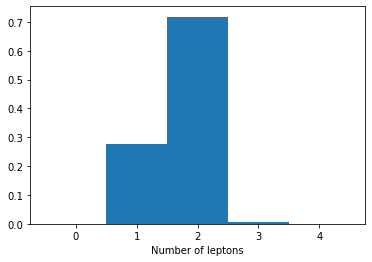

In [190]:
hist3.plot(histtype="fill")
plt.show()

Now let's show that this is normalised - we've already used the function required to do this!

In [178]:
print(hist3.sum())

1.0


### Over to you

__6)__ Normalise your histogram and redraw it.

<details>
    <summary>Click here for hint 1: </summary>
        Use .values() to access the height of each bar in the histogram.
</details>

<details>
    <summary>Click here for hint 2: </summary>
        Use .sum to find the sum of these heights - you'll need to divide each bar's height by the sum.
</details>

<details>
    <summary>Click here for hint 3: </summary>
        Redraw your histogram and assign new values to each bin.
</details>

In [ ]:
heights = my_hist.###
norm_heights = ###/heights.###
new_hist = Hist(hist.axis.Regular(###, ###, ###, label = ###))
new_hist[###] = norm_heights[###]
new_hist.###
plt.###

<details>
    <summary>Answer: </summary>
        
    heights = my_hist.values()
    norm_heights = heights/heights.sum()
    new_hist = Hist(hist.axis.Regular(5, -0.5, 4.5, label = "Number of jets"))
    new_hist[0:4] = norm_heights[0:4]
    new_hist.plot()
    plt.show()
</details>

[Return to contents](#c)

---

## Extension exercises <a name="6."></a>

1) Remember how to extract the list of branches from a TTree? Choose a new branch from `my_tree` and repeat steps __4-8__ above to show the distribution of that branch's variable over the dataset.

2) Are there any branches in the tree that you do not understand? List up to 3, then explore the
[ATLAS Open Data Documentation](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html)
- 
- 
- 
    
3) In the example above we plotted the number of leptons resulting from simulated ('Monte-Carlo'/'MC') collisions with one lepton and one jet at an energy of 13 TeV.

- You might have noticed the number of leptons plotted is not exactly 1 for each event. Why might that be?

<details>
    <summary>Click here for hint 1: </summary>
    What exact process is simulated in this file? Look at the last part of the file path, mc_361106.Zee.1largeRjet1lep.root
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Z-->ee is the process simulated here, but one of the electrons is being missed. What could have happened to it?
</details>

- Using the instructions for finding new datasets <a href="FindingOpenData.pdf"> here</a>, find a file with two 'final state' leptons and plot the number of leptons. How do the two plots compare?
    - Do you understand what all the file names mean?

<details>
    <summary>Click here for hint 1: </summary>
    Taking our file mc_361106.Zee.1largeRjet1lep.root as an example...
    
    - mc: Means that this file has simulated data
    - 361106: This is a unique identifying number for each file
    - Zee: This is the process being produced
    - 1largeRjet1lep: These are the particles being observed in the simulated detector, in this case 1 large radius jet and 1 lepton
</details>

4) So far, we have only plotted simulated data. 
- Using the instructions above, find the directory containing real collisions with 1 lepton and 1 jet in the final state.
- You might notice that the real data is split across several different files (e.g. data_A.1largeRjet1lep.root). Fill a histogram showing a branch of your choice with ALL the events in the full dataset

<details>
    <summary>Click here for hint 1: </summary>
    Load in each data file and its TTree under a separate name. Create a list containing all your separate trees:
    
    my_trees = [tree1,tree2,tree3,tree4] etc.
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Set up one histogram as usual
</details>

<details>
    <summary>Click here for hint 3: </summary>
    Add an extra layer to your histogram filling for loop, looping over the events in all of your trees 
    
    for tree in my_trees:
        for event in tree:
            ...
</details>

5) So far we have only shown one histogram at a time. Draw two histograms on the same plot to compare them directly e.g. the `n_lepton` branch for the samples with both 1 and 2 final state leptons

<details>
    <summary>Click here for hint 1: </summary>
    Fill two seprate histograms, but only set up 1 plot.
</details>

[Return to contents](#c)